In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [74]:
# Detecta a codificação do arquivo CSV
with open("./Planilha_oficial_filtrada_.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [75]:
with open(
    "./Planilha_oficial_filtrada_.csv", "r", encoding="utf-8", errors="replace"
) as f:
    data = f.read()

from io import StringIO

df = pd.read_csv(StringIO(data), encoding="utf-8")

In [76]:
import ftfy

# Corrige os caracteres mal codificados nas colunas
df.columns = [ftfy.fix_text(col) for col in df.columns]

In [77]:
novos_nomes_colunas = [
    "Curso",
    "Idade",
    "Entrada",
    "Genero",
    "Sexualidade",
    "Piadas machistas CA",
    "Comentarios de natureza sexual CA",
    "Olhares ou gestos sugestivos indesejados CA",
    "Mensagens ou ligacoes telefonicas indesejadas CA",
    "Convites indesejados CA",
    "Toques indesejados CA",
    "Insistencia para encontro sexuais indesejados CA",
    "Piadas de cunho discriminatorio CA",
    "Sofreu critica ao seu trabalho CA",
    "Atribuivso proposital e sistemstica de tarefas CA",
    "Isolamento do restante do grupo CA",
    "Ignorar sua presenca CA",
    "Ser desacreditada CA",
    "Ameacada/o de violencia fisica CA",
    "Agredida/o fisicamente CA",
    "Elogiavam constantemente CA",
    "Piadas machistas AS",
    "Comentarios de natureza sexual AS",
    "Olhares ou gestos sugestivos indesejados AS",
    "Mensagens ou ligacoes telefonicas indesejadas AS",
    "Convites indesejados AS",
    "Toques indesejados AS",
    "Insistencia para encontro sexuais indesejados AS",
    "Piadas de cunho discriminatorio AS",
    "Sofreu critica ao seu trabalho AS",
    "Atribuicao proposital e sistematica AS",
    "Isolamento do restante do grupo AS",
    "Ignorar sua presenca AS",
    "Ser desacreditada/o AS",
    "Ameacada/o de violencia fisica AS",
    "Agredida/o fisicamente AS",
    "Elogiavam constantemente AS",
    "ASnaFACOM",
    "Local",
    "Assediador",
    "Houve denuncia",
    "Orgao Denuncia",
    "VG2",
    "VM3",
    "VG3",
    "VG4",
    "VG5",
    "VM1",
    "VG1",
    "VG6",
    "IV1",
    "IV2",
    "VM2",
    "ASantesFACOM?",
]
mapper = dict(zip(df.columns, novos_nomes_colunas))

df = df.rename(columns=mapper)

In [78]:
df.head()

,Curso,Idade,Entrada,Genero,Sexualidade,Piadas machistas CA,Comentarios de natureza sexual CA,Olhares ou gestos sugestivos indesejados CA,Mensagens ou ligacoes telefonicas indesejadas CA,Convites indesejados CA,...,VG3,VG4,VG5,VM1,VG1,VG6,IV1,IV2,VM2,ASantesFACOM?
0,Ci�ncia da Computa��o,20 - 25,2020.0,Homem,Prefiro n�o responder,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2,3.0,4.0,5.0,5.0,1.0,N�o
1,Sistemas de Informa��o,20 - 25,2020.0,Queer,Homossexual,0.0,0.0,0.0,0.0,0.0,...,1.0,NaN,3.0,1,3.0,3.0,7.0,2.0,1.0,Sim
2,Ci�ncia da Computa��o,20 - 25,2020.0,Homem,Homossexual,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1,5.0,4.0,7.0,5.0,1.0,N�o
3,Ci�ncia da Computa��o,20 - 25,2017.0,Homem,Heterossexual,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,3,4.0,NaN,3.0,7.0,2.0,N�o
4,Ci�ncia da Computa��o,20 - 25,2019.0,Homem,Heterossexual,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1,NaN,NaN,0.0,7.0,4.0,N�o


In [79]:
df.describe()

,Entrada,Piadas machistas CA,Comentarios de natureza sexual CA,Olhares ou gestos sugestivos indesejados CA,Mensagens ou ligacoes telefonicas indesejadas CA,Convites indesejados CA,Toques indesejados CA,Insistencia para encontro sexuais indesejados CA,Piadas de cunho discriminatorio CA,Sofreu critica ao seu trabalho CA,...,VM3,VG3,VG4,VG5,VM1,VG1,VG6,IV1,IV2,VM2
count,89.000000,90.000000,90.000000,90.000000,90.0,90.0,90.0,90.0,90.000000,90.000000,...,91.000000,74.000000,64.000000,75.000000,91.000000,89.000000,81.000000,90.000000,88.000000,90.00000
mean,2020.393258,0.322222,0.044444,0.011111,0.0,0.0,0.0,0.0,0.255556,0.066667,...,1.769231,1.756757,1.640625,1.853333,1.637363,3.269663,3.469136,5.177778,3.181818,1.70000
std,2.075933,0.469946,0.207235,0.105409,0.0,0.0,0.0,0.0,0.438617,0.250841,...,1.065384,1.301325,1.089156,1.372444,1.110720,1.459795,1.096431,3.139376,3.038245,1.18464
min,2013.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000
25%,2019.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,0.000000,1.00000
50%,2021.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,5.000000,2.500000,1.00000
75%,2022.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.750000,0.000000,...,2.500000,2.000000,2.000000,3.000000,2.000000,5.000000,4.000000,7.000000,5.000000,2.00000
max,2023.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,5.00000


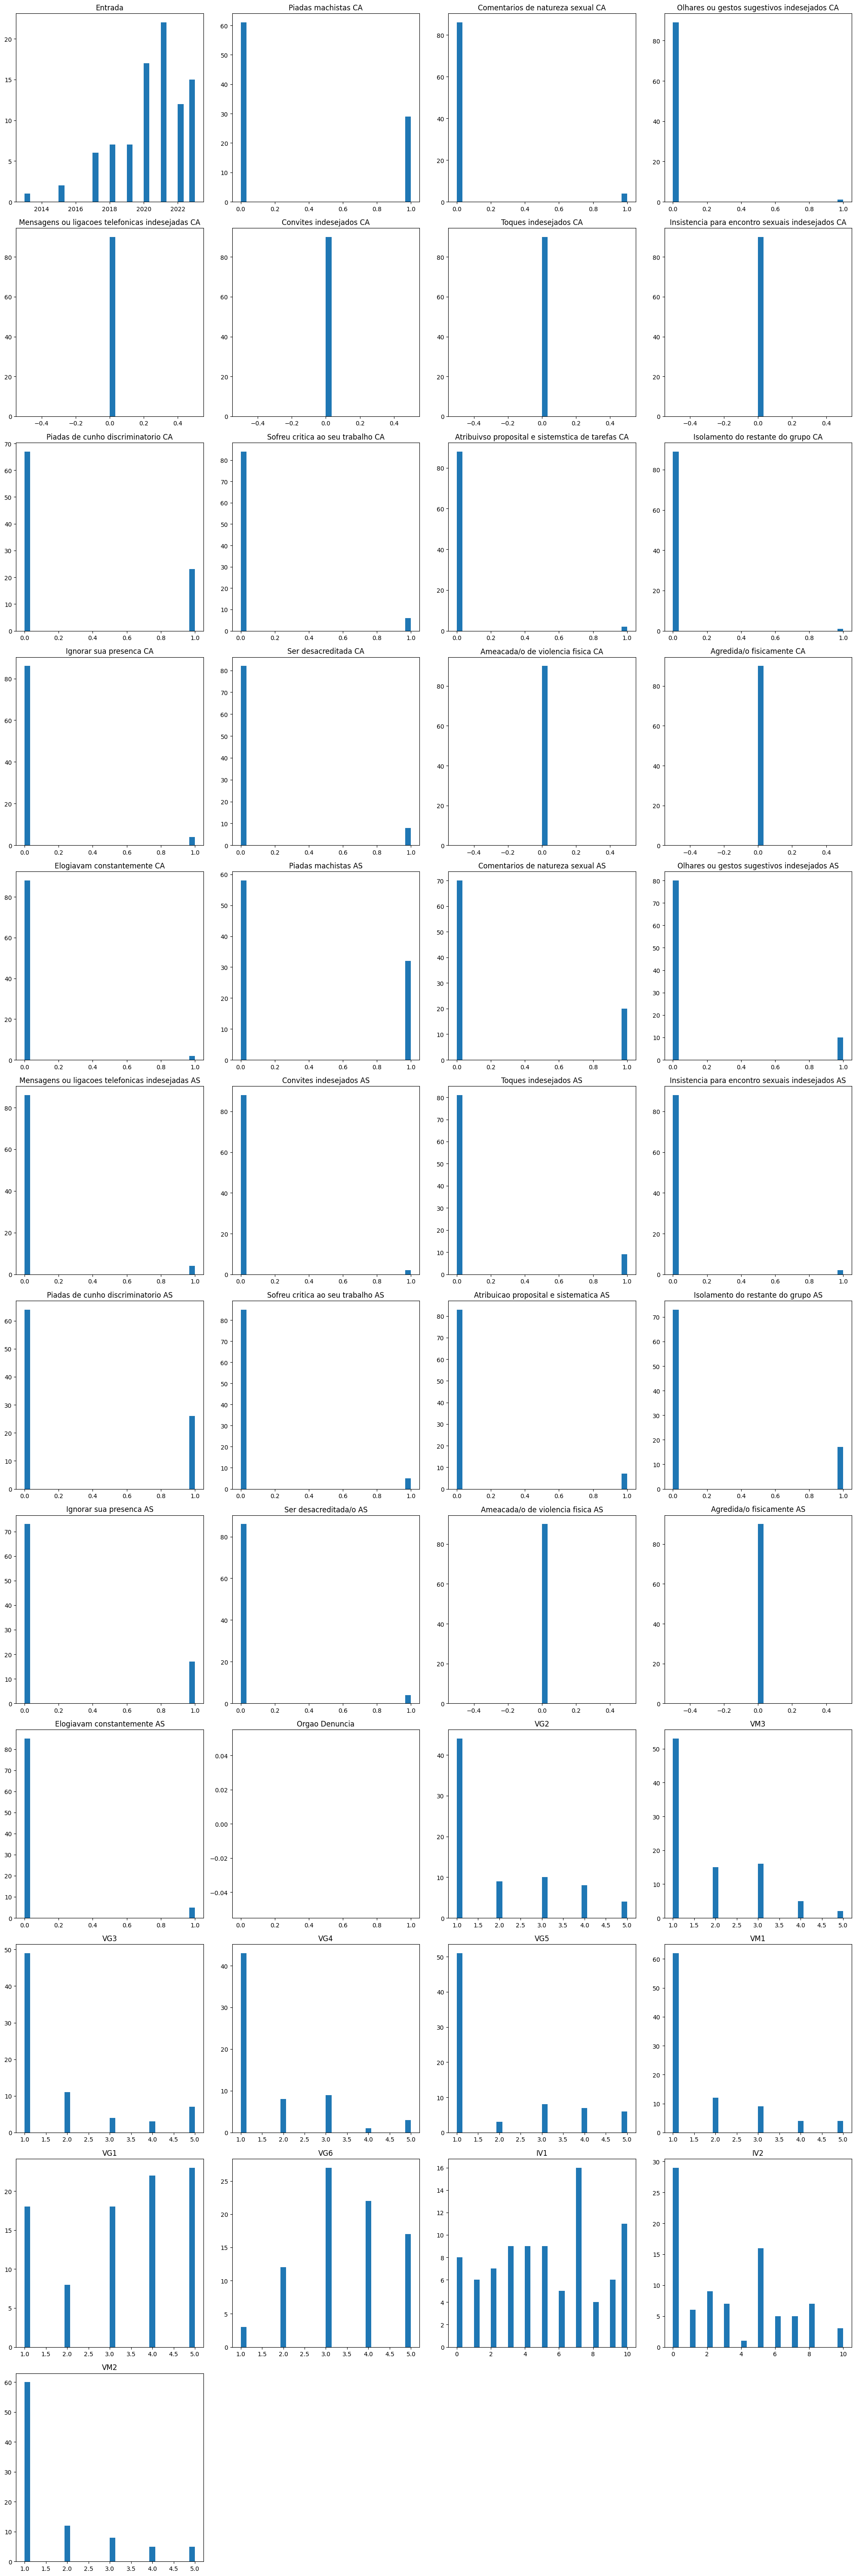

In [80]:
num_cols = df.select_dtypes(include=[np.number]).columns
QNT_COLUNAS = 4
num_plots = len(num_cols)
num_rows = num_plots // QNT_COLUNAS
if num_plots % QNT_COLUNAS:
    num_rows += 1

fig, axs = plt.subplots(num_rows, QNT_COLUNAS, figsize=(20, num_rows * 5))

for i, col in enumerate(num_cols):
    row = i // QNT_COLUNAS
    col = i % QNT_COLUNAS
    data = df[num_cols[i]].dropna()
    axs[row, col].hist(data, bins=30)
    axs[row, col].set_title(num_cols[i])

# Remover subplots vazios
for j in range(i + 1, num_rows * QNT_COLUNAS):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

In [81]:
# Seleciona colunas onde há valores diferentes
df = df[df.columns[df.nunique() > 1]]

In [82]:
for column_name, column_type in zip(df.dtypes.index, df.dtypes.values):
    if column_type == "object" or column_type == "string":
        print(f"{column_name} ------> {df[column_name].unique()}")

Curso ------> ['Ci�ncia da Computa��o' 'Sistemas de Informa��o']
Idade ------> ['20 - 25' '25 - 30' '17 - 20' '30 - 35']
Genero ------> ['Homem' 'Queer' 'Mulher']
Sexualidade ------> ['Prefiro n�o responder' 'Homossexual' 'Heterossexual' 'Pansexual'
 'Bissexual' 'Assexual' nan]
ASnaFACOM ------> ['N�o' 'Sim']
Local ------> [nan 'Em um bar. em frente a universidade ' 'Em um bar pr�ximo '
 'No ambiente de sala de aula. no laborat�rio ou grupo de pesquisa'
 'Hello world' 'No ambiente de sala de aula']
ASantesFACOM? ------> ['N�o' 'Sim']


In [83]:
df = df[
    df["Sexualidade"].isin(
        [
            "Homossexual",
            "Heterossexual",
            "Pansexual",
            "Bissexual",
            "Assexual",
        ]
    )
]

In [84]:
df["ASnaFACOM"] = df["ASnaFACOM"].fillna("N�o")

df["ASnaFACOM"] = df["ASnaFACOM"].map(
    {"Sim": True, "N�o": False, "nan": False})


df["ASantesFACOM?"] = df["ASantesFACOM?"].fillna("N�o")

df["ASantesFACOM?"] = df["ASantesFACOM?"].map(
    {"Sim": True, "N�o": False, "nan": False})

df["Curso"] = df["Curso"].map(
    {"Sistemas de Informa��o": "bsi", "Ci�ncia da Computa��o": "bcc"}
)
df["Local"] = df["Local"].map(
    {
        "Em um bar. em frente a universidade ": "bar_proximo",
        "Em um bar pr�ximo ": "bar_proximo",
        "No ambiente de sala de aula. no laborat�rio ou grupo de pesquisa": "sala_aula",
        "No ambiente de sala de aula": "sala_aula",
    }
)

In [85]:
idade_inf = df["Idade"].apply(lambda x: x.split(" ")[0]).astype(int)
idade_sup = df["Idade"].apply(lambda x: x.split(" ")[-1]).astype(int)

df["Idade"] = (idade_inf + idade_sup) / 2

Removendo caso ruidoso que não respondeu as perguntas CAs

In [86]:
df = df.dropna(subset=[col for col in df.columns if "CA" in col])

# Tentativa de classificação

In [87]:
classification_df = df.copy()
classification_df["target"] = (
    classification_df["Genero"] + "_" + classification_df["Sexualidade"]
)

classification_df["target"]

1        Queer_Homossexual
2        Homem_Homossexual
3      Homem_Heterossexual
4      Homem_Heterossexual
5        Homem_Homossexual
              ...         
85         Homem_Bissexual
86    Mulher_Heterossexual
87     Homem_Heterossexual
88     Homem_Heterossexual
89         Mulher_Assexual
Name: target, Length: 87, dtype: object

/tmp/ipykernel_14707/402529803.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = classification_df.corr()


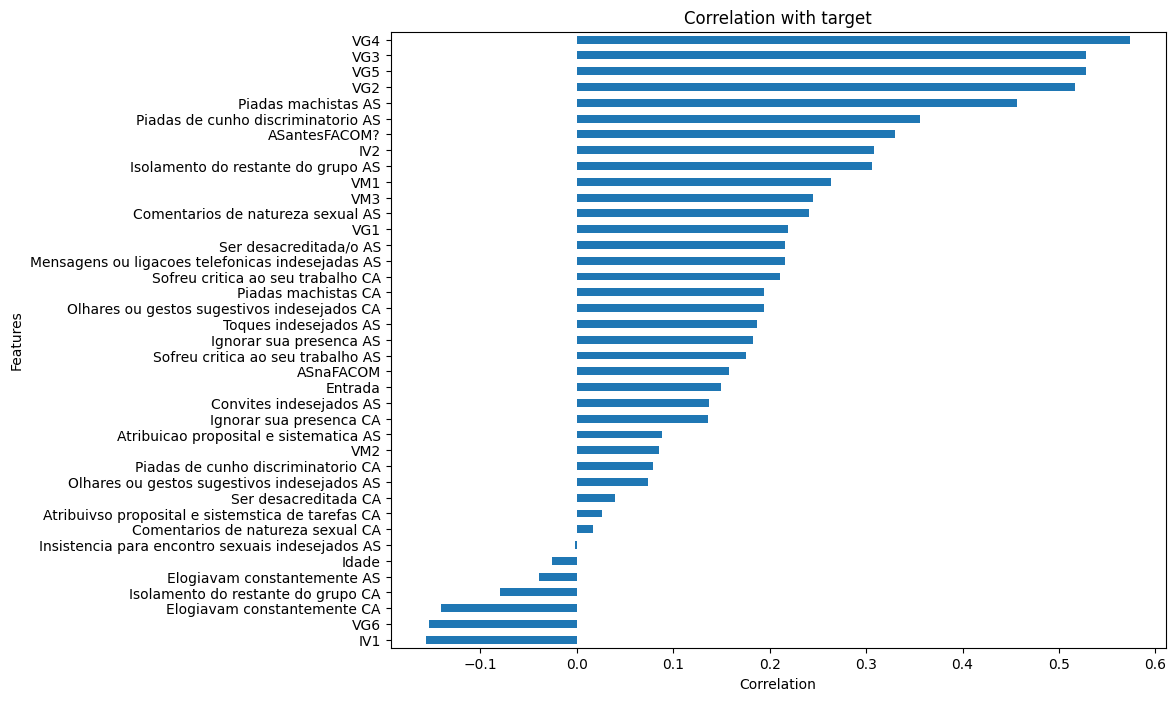

In [88]:
classification_df["target"] = classification_df["target"].astype("category").cat.codes
correlation = classification_df.corr()

target_correlation = correlation["target"]

# Plota as correlações com a coluna 'target'
plt.figure(figsize=(10, 8))
target_correlation.drop("target").sort_values().plot(kind="barh")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.title("Correlation with target")
plt.show()

## Utilizando classificação knn

In [89]:
from sklearn.preprocessing import StandardScaler

# Select the columns to be normalized
columns_to_normalize = [
    "Idade",
    "Entrada",
    "Piadas machistas CA",
    "Comentarios de natureza sexual CA",
    "Olhares ou gestos sugestivos indesejados CA",
    "Piadas de cunho discriminatorio CA",
    "Sofreu critica ao seu trabalho CA",
    "Atribuivso proposital e sistemstica de tarefas CA",
    "Isolamento do restante do grupo CA",
    "Ignorar sua presenca CA",
    "Ser desacreditada CA",
    "Elogiavam constantemente CA",
    "Piadas machistas AS",
    "Comentarios de natureza sexual AS",
    "Olhares ou gestos sugestivos indesejados AS",
    "Mensagens ou ligacoes telefonicas indesejadas AS",
    "Convites indesejados AS",
    "Toques indesejados AS",
    "Insistencia para encontro sexuais indesejados AS",
    "Piadas de cunho discriminatorio AS",
    "Sofreu critica ao seu trabalho AS",
    "Atribuicao proposital e sistematica AS",
    "Isolamento do restante do grupo AS",
    "Ignorar sua presenca AS",
    "Ser desacreditada/o AS",
    "Elogiavam constantemente AS",
]

# Create the StandardScaler object
scaler = StandardScaler()

# Normalize the selected columns
classification_df[columns_to_normalize] = scaler.fit_transform(
    classification_df[columns_to_normalize]
)

In [90]:
from sklearn.preprocessing import LabelEncoder

# Select string columns
string_cols = classification_df.select_dtypes(
    include=["object", "string"]).columns

# Apply LabelEncoder to each string column
for col in string_cols:
    le = LabelEncoder()
    classification_df[col] = le.fit_transform(classification_df[col])

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Split the dataset into training and testing sets
X = classification_df.drop(columns=["target"])
y = classification_df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
imputer = SimpleImputer(strategy="mean")

# Aplica o imputer aos conjuntos de treinamento e teste
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Preprocess the data if necessary (e.g., scaling)

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Predict the target values for the testing set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2777777777777778
